In [1]:
import gc
import matplotlib.pyplot as plt
import itertools
import cv2
import os
import numpy as np
import pandas as pd
import sklearn
import glob

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = r"/content/drive/My Drive/dataset/dataset/bad"

In [4]:
dpath = os.listdir(path)

In [5]:
dpath

['fsw ann 4.jpg',
 'r.jpg',
 'fswmg.jpg',
 'FSW.jpg',
 'ictact fsw.png',
 'fsw ann 15.jpg',
 'Aa.jpg',
 'fsw ann 6.png',
 'fsw ann 7.jpg',
 'ictact fsw 1.png']

In [6]:
dirname =[]
for i in range(0,len(dpath)):
  dirname.append(path + '/' + dpath[i])

In [7]:
dirname = sorted(dirname)

In [8]:
dirname

['/content/drive/My Drive/dataset/dataset/bad/Aa.jpg',
 '/content/drive/My Drive/dataset/dataset/bad/FSW.jpg',
 '/content/drive/My Drive/dataset/dataset/bad/fsw ann 15.jpg',
 '/content/drive/My Drive/dataset/dataset/bad/fsw ann 4.jpg',
 '/content/drive/My Drive/dataset/dataset/bad/fsw ann 6.png',
 '/content/drive/My Drive/dataset/dataset/bad/fsw ann 7.jpg',
 '/content/drive/My Drive/dataset/dataset/bad/fswmg.jpg',
 '/content/drive/My Drive/dataset/dataset/bad/ictact fsw 1.png',
 '/content/drive/My Drive/dataset/dataset/bad/ictact fsw.png',
 '/content/drive/My Drive/dataset/dataset/bad/r.jpg']

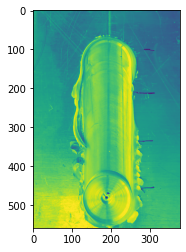

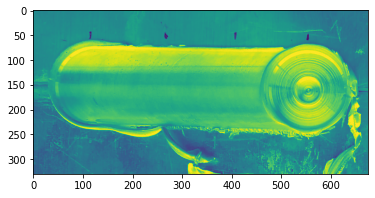

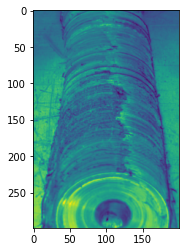

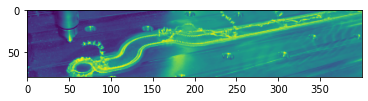

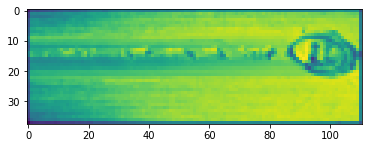

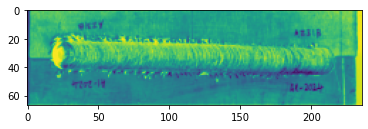

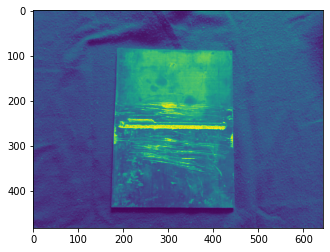

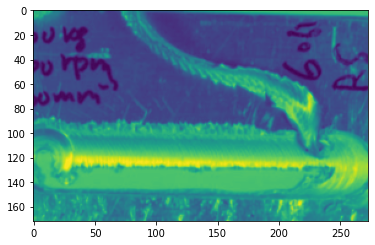

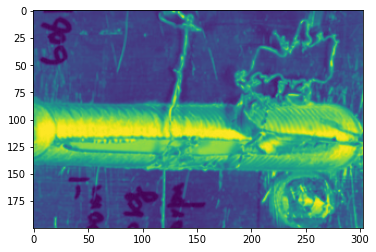

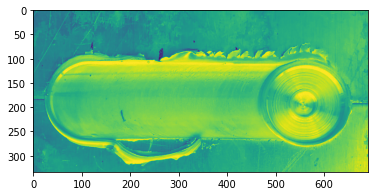

In [9]:
import numpy as np
from skimage import data, color
from skimage.transform import rescale, resize

for i in range(0,len(dirname)):
  grayimage = color.rgb2gray(cv2.imread(dirname[i]))
  image_resized = resize(grayimage, (int(grayimage.shape[0] / 4), int(grayimage.shape[1] / 4)),
                        anti_aliasing=True)
  plt.imshow(image_resized)
  plt.show()

In [10]:
import skimage
import skimage.io

test_img_f = '/content/drive/My Drive/dataset/dataset/bad/FSW.jpg'
im = skimage.io.imread(test_img_f)
im_g = skimage.io.imread(test_img_f)

#skimage.io.imshow(im)
im.dtype

dtype('uint8')

Text(0.5, 1.0, 'NIR')

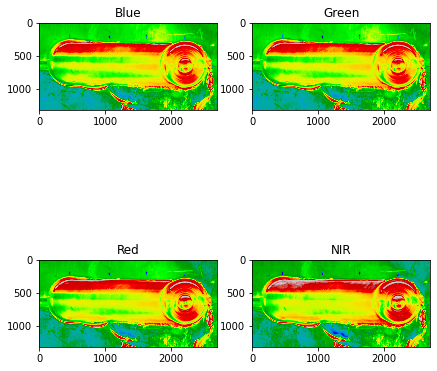

In [11]:
fig, axes = plt.subplots(2,2, figsize=(7, 8))
ax = axes.ravel()

ax[0] = plt.subplot(2, 2, 1, adjustable='box')
ax[0].imshow(im[:,:,0], cmap='nipy_spectral')
for i in range(3):
    ax[i+1] = plt.subplot(2, 2, i+2, sharex=ax[0], sharey=ax[0], adjustable='box')
    ax[i+1].imshow(im[:,:,i], cmap='nipy_spectral')
    
ax[0].set_title('Blue')
ax[1].set_title('Green')
ax[2].set_title('Red')
ax[3].set_title('NIR')

In [12]:
im2 = im[2, 1, 0] # RGB
im3 = im[3, 2, 1] # NIR-R-G
im4 = im[3, 2, 0]

im2

132

In [13]:
im3

128

In [14]:
im4

133

In [15]:
dims = np.shape(im)

In [16]:
dims

(1320, 2706, 3)

In [17]:
np.min(im), np.max(im)

(0, 255)

In [18]:
pixel_matrix = np.reshape(im, (dims[0] * dims[1], dims[2]))
print(np.shape(pixel_matrix))

(3571920, 3)


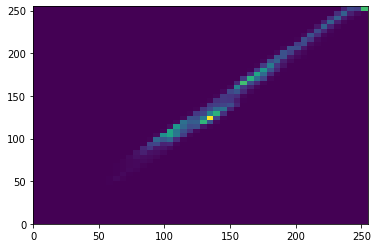

In [19]:
_ = plt.hist2d(pixel_matrix[:,1], pixel_matrix[:,2], bins=(50,50))

In [20]:
fifth = plt.imread(dirname[5])
dims = np.shape(fifth)
pixel_matrix5 = np.reshape(fifth, (dims[0] * dims[1], dims[2]))

In [21]:
pixel_matrix5

array([[130, 131, 123],
       [113, 115, 104],
       [107, 109,  98],
       ...,
       [247, 255, 248],
       [247, 255, 248],
       [254, 255, 253]], dtype=uint8)

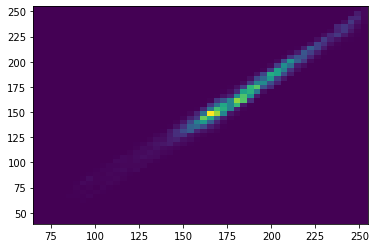

In [22]:
_ = plt.hist2d(pixel_matrix5[:,1], pixel_matrix5[:,2], bins=(50,50))

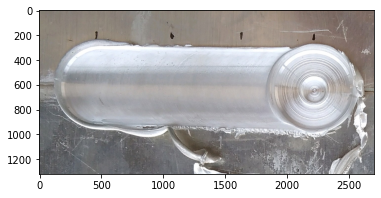

In [23]:
plt.imshow(im)

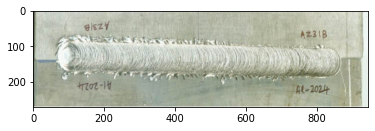

In [24]:
plt.imshow(fifth)

**Simple kMeans CLustering**


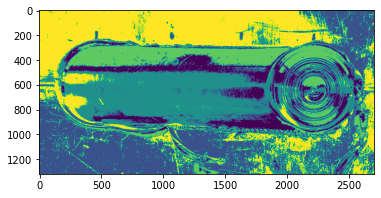

In [25]:
from sklearn import cluster

kmeans = cluster.KMeans(5)
clustered = kmeans.fit_predict(pixel_matrix)

dims = np.shape(im)
clustered_img = np.reshape(clustered, (dims[0], dims[1]))
plt.imshow(clustered_img)

In [26]:
ind0, ind1, ind2, ind3 = [np.where(clustered == x)[0] for x in [0, 1, 2, 3]]

**COLOR CHANNELS**

Text(0.5, 0, 'Red channel')

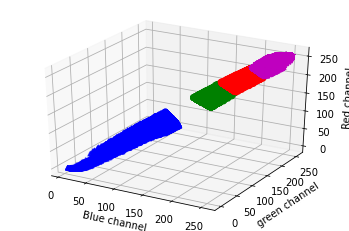

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot_vals = [('r', 'o', ind0),
             ('b', '^', ind1),
             ('g', '8', ind2),
             ('m', '*', ind3)]

for c, m, ind in plot_vals:
    xs = pixel_matrix[ind, 0]
    ys = pixel_matrix[ind, 1]
    zs = pixel_matrix[ind, 2]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('Blue channel')
ax.set_ylabel('green channel')
ax.set_zlabel('Red channel')

**color value histograms for pixel matrix from first image**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

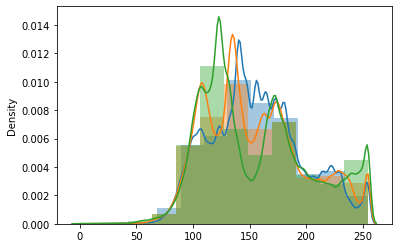

In [28]:
import seaborn as sns
sns.distplot(pixel_matrix[:,0], bins=12)
sns.distplot(pixel_matrix[:,1], bins=12)
sns.distplot(pixel_matrix[:,2], bins=12)

In [29]:
img1 = cv2.imread(dirname[0])
img2 = cv2.imread(dirname[2])
img3 = cv2.imread(dirname[3])
img4 = cv2.imread(dirname[1])
img5 = cv2.imread(dirname[5])


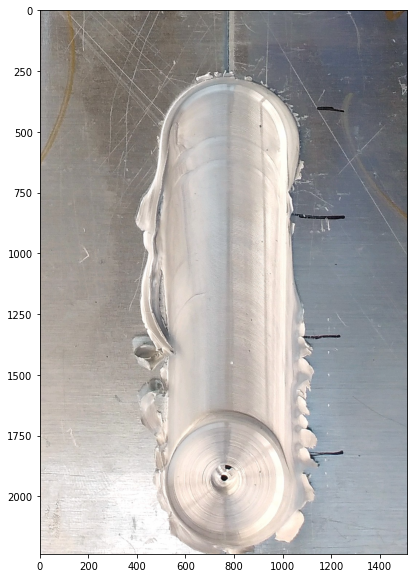

In [30]:
img_list = (img1, img2, img3, img4, img5)

plt.figure(figsize=(8,10))
plt.imshow(img_list[0])
plt.show()

In [31]:
class MSImage():
    """Lightweight wrapper for handling image to matrix transforms. No setters,
    main point of class is to remember image dimensions despite transforms."""
    
    def __init__(self, img):
        """Assume color channel interleave that holds true for this set."""
        self.img = img
        self.dims = np.shape(img)
        self.mat = np.reshape(img, (self.dims[0] * self.dims[1], self.dims[2]))

    @property
    def matrix(self):
        return self.mat
        
    @property
    def image(self):
        return self.img
    
    def to_flat_img(self, derived):
        """"Use dims property to reshape a derived matrix back into image form when
        derived image would only have one band."""
        return np.reshape(derived, (self.dims[0], self.dims[1]))
    
    def to_matched_img(self, derived):
        """"Use dims property to reshape a derived matrix back into image form."""
        return np.reshape(derived, (self.dims[0], self.dims[1], self.dims[2]))

In [32]:
msi1 = MSImage(img1)
print(np.shape(msi1.matrix))
print(np.shape(msi1.img))

(3380107, 3)
(2237, 1511, 3)


In [33]:
def bnormalize(mat):
    """much faster brightness normalization, since it's all vectorized"""
    bnorm = np.zeros_like(mat, dtype=np.float32)
    maxes = np.max(mat, axis=1)
    bnorm = mat / np.vstack((maxes, maxes, maxes)).T
    return bnorm

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


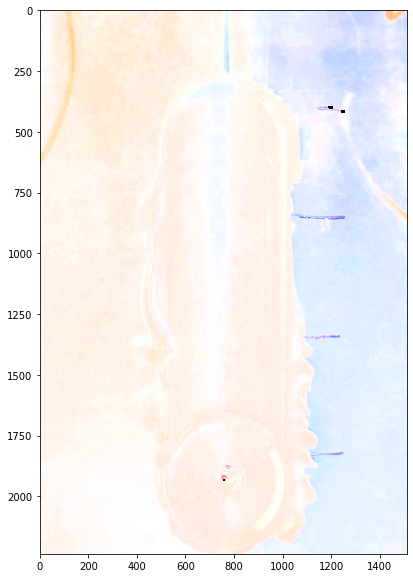

In [34]:
bnorm = bnormalize(msi1.matrix)
bnorm_img = msi1.to_matched_img(bnorm)
plt.figure(figsize=(8,10))
plt.imshow(bnorm_img)
plt.show()

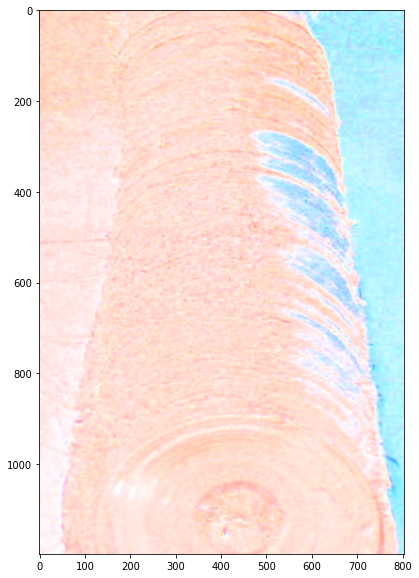

In [35]:
msi2 = MSImage(img2)
bnorm2 = bnormalize(msi2.matrix)
bnorm2_img = msi2.to_matched_img(bnorm2)
plt.figure(figsize=(8,10))
plt.imshow(bnorm2_img)
plt.show()

**USING THRESHOLDS FOR BRIGHTNESS RESTRICTION**

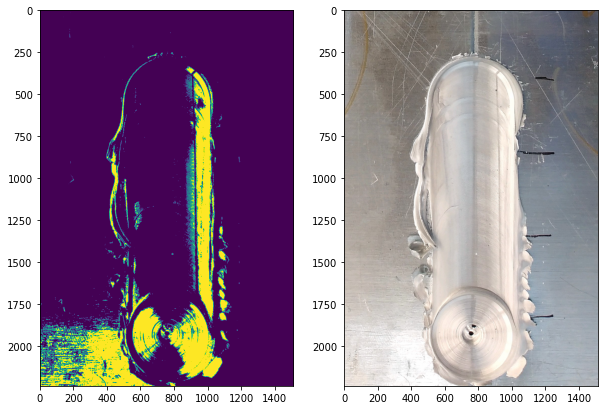

In [36]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.imshow(img1[:,:,0] > 230)
plt.subplot(122)
plt.imshow(img1)
plt.show()

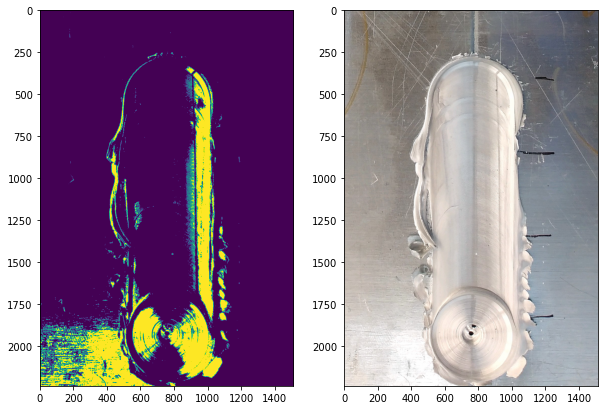

In [37]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.imshow(img1[:,:,0] > 230)
plt.subplot(122)
plt.imshow(img1)
plt.show()

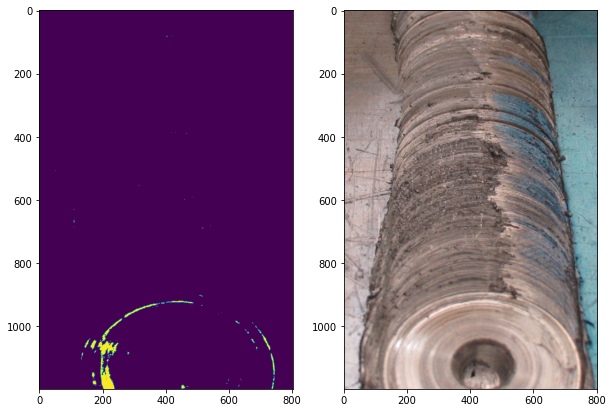

In [38]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.imshow(img2[:,:,0] > 230)
plt.subplot(122)
plt.imshow(img2)
plt.show()

In [39]:
print(np.min(bnorm2_img[:,:,0]))
print(np.max(bnorm2_img[:,:,0]))
print(np.mean(bnorm2_img[:,:,0]))
print(np.std(bnorm2_img[:,:,0]))

0.18309859154929578
1.0
0.9524929527067031
0.10831080030999406


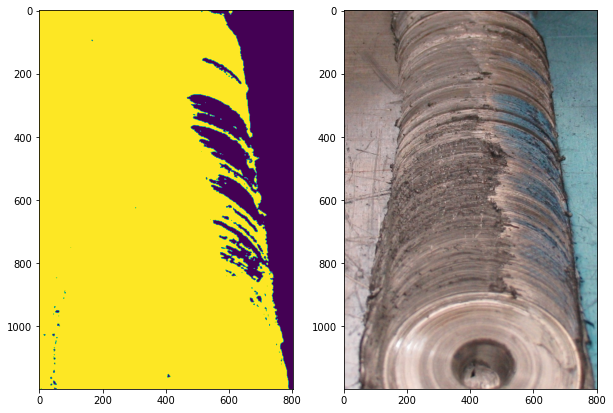

In [40]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.imshow(bnorm2_img[:,:,0] > 0.98)
plt.subplot(122)
plt.imshow(img2)
plt.show()

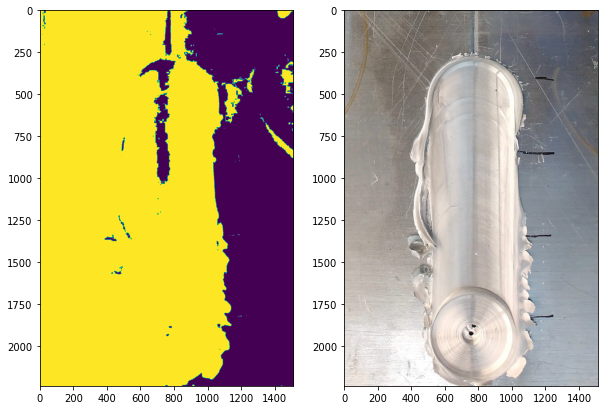

In [41]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.imshow(bnorm_img[:,:,0] > 0.98)
plt.subplot(122)
plt.imshow(img1)
plt.show()

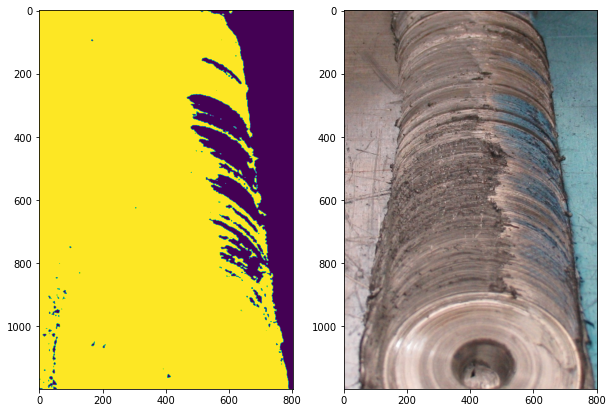

In [42]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.imshow((bnorm2_img[:,:,0] > 0.9999) & \
           (bnorm2_img[:,:,1] < 0.9999) & \
           (bnorm2_img[:,:,2] < 0.9999))
plt.subplot(122)
plt.imshow(img2)
plt.show()

In [43]:
import skimage
from skimage.feature import greycomatrix, greycoprops
from skimage.filters import sobel

In [46]:
set1 = [MSImage(im)]

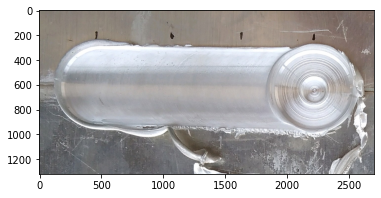

In [47]:
plt.imshow(set1[0].image)

**SOBEL EDGE DETECTION**

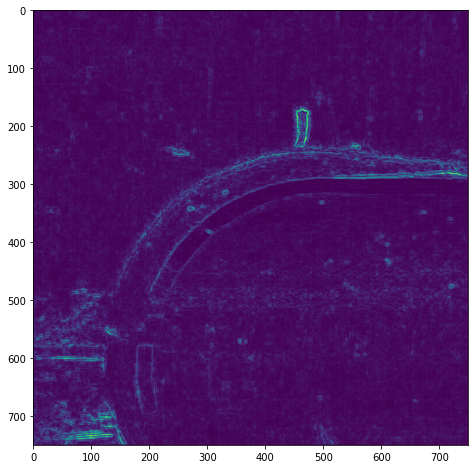

In [48]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(sobel(set1[0].image[:750,:750,2]))

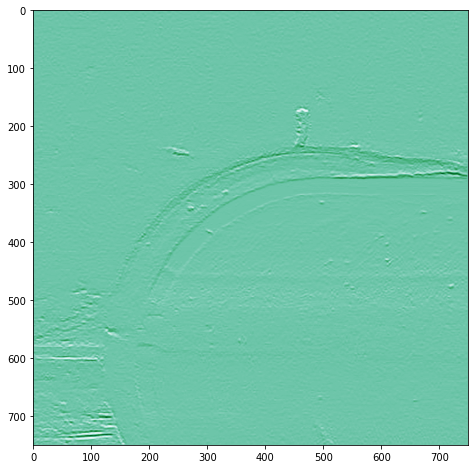

In [49]:
from skimage.filters import sobel_h

# can also apply sobel only across one direction.
fig = plt.figure(figsize=(8, 8))
plt.imshow(sobel_h(set1[0].image[:750,:750,2]), cmap='BuGn')

In [50]:
from sklearn.decomposition import PCA

pca = PCA(3)
pca.fit(set1[0].matrix)
set1_0_pca = pca.transform(set1[0].matrix)
set1_0_pca_img = set1[0].to_matched_img(set1_0_pca)

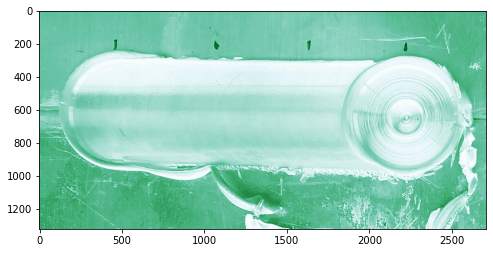

In [51]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(set1_0_pca_img[:,:,0], cmap='BuGn')

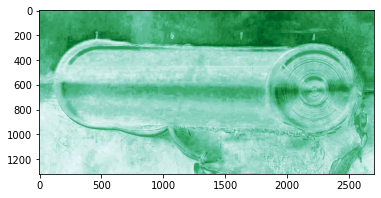

In [52]:
plt.imshow(set1_0_pca_img[:,:,1], cmap='BuGn')

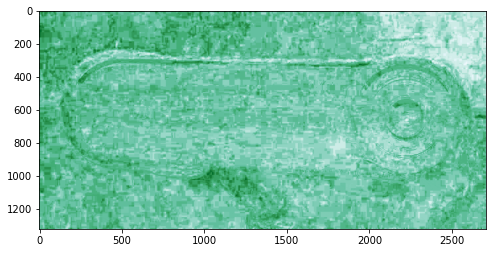

In [53]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(set1_0_pca_img[:,:,2], cmap='BuGn')

**GLCM Textures**

In [ ]:
sub = set1[0].image[:150,:150,2]

In [ ]:
def glcm_image(img, measure="dissimilarity"):
    """TODO: allow different window sizes by parameterizing 3, 4. Also should
    parameterize direction vector [1] [0]"""
    texture = np.zeros_like(sub)

    # quadratic looping in python w/o vectorized routine, yuck!
    for i in range(img.shape[0] ):  
        for j in range(sub.shape[1] ):  
          
            # don't calculate at edges
            if (i < 3) or \
               (i > (img.shape[0])) or \
               (j < 3) or \
               (j > (img.shape[0] - 4)):          
                continue  
        
            # calculate glcm matrix for 7 x 7 window, use dissimilarity (can swap in
            # contrast, etc.)
            glcm_window = img[i-3: i+4, j-3 : j+4]  
            glcm = greycomatrix(glcm_window, [1], [0],  symmetric = True, normed = True )   
            texture[i,j] = greycoprops(glcm, measure)  
    return texture

In [ ]:
dissimilarity = glcm_image(sub, "dissimilarity")

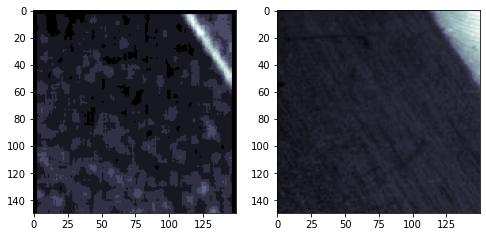

In [ ]:
fig = plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plt.imshow(dissimilarity, cmap="bone")
plt.subplot(1,2,2)
plt.imshow(sub, cmap="bone")

**HSV Transform**

In [ ]:
from skimage import color

hsv = color.rgb2hsv(set1[0].image)

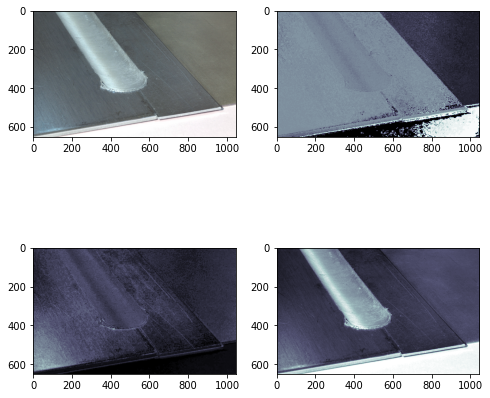

In [ ]:
fig = plt.figure(figsize=(8, 8))
plt.subplot(2,2,1)
plt.imshow(set1[0].image, cmap="bone")
plt.subplot(2,2,2)
plt.imshow(hsv[:,:,0], cmap="bone")
plt.subplot(2,2,3)
plt.imshow(hsv[:,:,1], cmap='bone')
plt.subplot(2,2,4)
plt.imshow(hsv[:,:,2], cmap='bone')

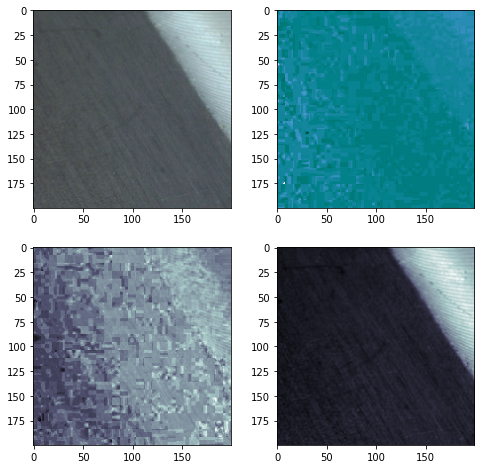

In [ ]:
fig = plt.figure(figsize=(8, 8))
plt.subplot(2,2,1)
plt.imshow(set1[0].image[:200,:200,:])
plt.subplot(2,2,2)
plt.imshow(hsv[:200,:200,0], cmap="PuBuGn")
plt.subplot(2,2,3)
plt.imshow(hsv[:200,:200,1], cmap='bone')
plt.subplot(2,2,4)
plt.imshow(hsv[:200,:200,2], cmap='bone')

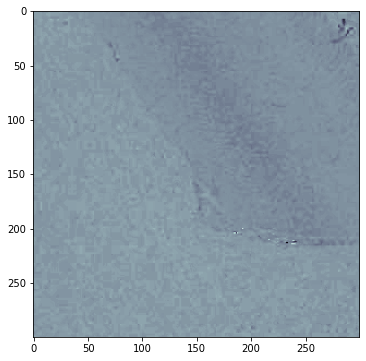

In [ ]:
fig = plt.figure(figsize=(8, 6))
plt.imshow(hsv[200:500,200:500,0], cmap='bone')

In [ ]:
hsvmsi = MSImage(hsv)

**SHADOW Detection**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

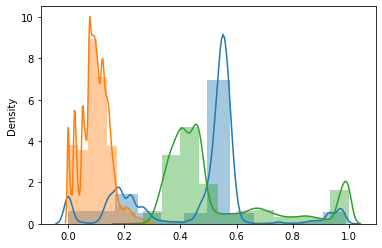

In [ ]:
import seaborn as sns
sns.distplot(hsvmsi.matrix[:,0], bins=12)
sns.distplot(hsvmsi.matrix[:,1], bins=12)
sns.distplot(hsvmsi.matrix[:,2], bins=12)

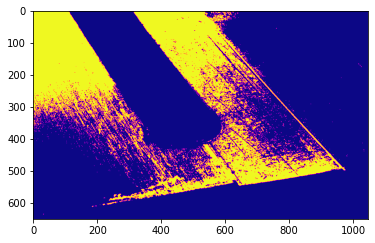

In [ ]:
plt.imshow(hsvmsi.image[:,:,2] < 0.4, cmap="plasma")

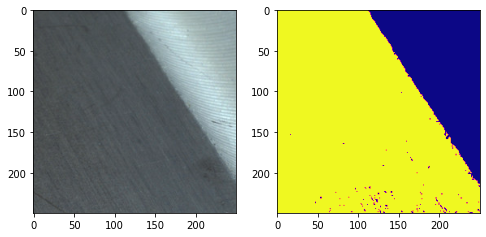

In [ ]:
fig = plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plt.imshow(set1[0].image[:250,:250,:])
plt.subplot(1,2,2)
plt.imshow(hsvmsi.image[:250,:250,2] < 0.4, cmap="plasma")

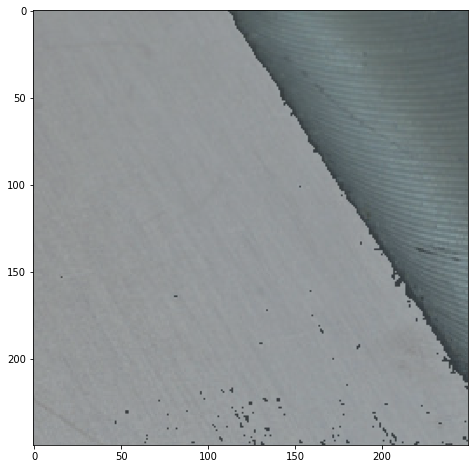

In [ ]:
fig = plt.figure(figsize=(8, 8))
img2 = plt.imshow(set1[0].image[:250,:250,:], interpolation='nearest')
img3 = plt.imshow(hsvmsi.image[:250,:250,2] < 0.4, cmap='binary_r', alpha=0.4)
plt.show()